<pre>
Name: Ritika Sarkar
Reg. No.: 19BAI1031
</pre>

### Image Classification & Machine learning based Medical Image Classification

Dataset - [Histopathologic Cancer Detection](https://www.kaggle.com/c/histopathologic-cancer-detection)

#### Machine Learning

In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


In [65]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
# from google.colab.patches import cv2_imshow
import pandas as pd 
import os
from skimage.transform import resize
from skimage.io import imread

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve, auc

In [68]:
df = pd.read_csv('../input/histopathologic-cancer-detection/train_labels.csv')

In [69]:
df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [70]:
image = plt.imread('../input/histopathologic-cancer-detection/train/'+df['id'][1]+'.tif')

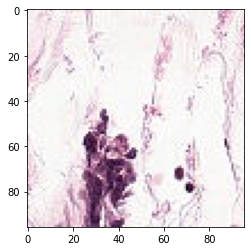

In [71]:
plt.imshow(image)

In [72]:
df.shape[0]

220025

In [73]:
# taking a subset of the dataset due to memory error
dfnew = df.sample(n=500) # 500 samples

In [74]:
dfnew['label'].value_counts() # class imbalance

0    317
1    183
Name: label, dtype: int64

In [75]:
dfnew.reset_index(drop = True, inplace = True)

In [76]:
dfnew.head()

,id,label
0,f50f3f059556758d70ff55d9133e2a1e9768bd65,0
1,9490666c6b96e7375a74137a046a0d21e7d2e35a,0
2,972e2b3c169a3dcbfbc5670605290f9a99363c04,0
3,511c4fc8c8dfc5ce2fe2338b649cfb0c1fa60660,0
4,fee1e36717b0b61e82d484f104fadd72491f9bb5,0


In [77]:
flat_data_arr = [] #input array
target_arr = [] #output array
datadir = '../input/histopathologic-cancer-detection/train/'

#path which contains all the categories of images
for i in range(dfnew.shape[0]):
    img = dfnew['id'][i] + '.tif'
    img_array = imread(os.path.join(datadir,img))
#     grayimg = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    img_resized = resize(img_array,(96,96,3)) # flattening the image, pixels serve as features
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(dfnew['label'][i])

In [78]:
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)
dfn = pd.DataFrame(flat_data) #dataframe
dfn['Target'] = target

In [79]:
dfn.head()

,0,1,2,3,4,5,6,7,8,9,...,27639,27640,27641,27642,27643,27644,27645,27646,27647,Target
0,0.866667,0.843137,0.858824,0.945098,0.905882,0.937255,0.909804,0.858824,0.898039,0.968627,...,0.996078,0.960784,0.964706,1.000000,0.945098,0.956863,1.000000,0.956863,0.964706,0
1,0.949020,0.956863,0.945098,0.960784,0.960784,0.952941,0.960784,0.960784,0.952941,0.956863,...,0.874510,0.670588,0.756863,0.945098,0.733333,0.827451,0.976471,0.756863,0.862745,0
2,0.717647,0.529412,0.615686,0.913725,0.741176,0.831373,0.984314,0.835294,0.917647,0.792157,...,0.839216,0.631373,0.709804,1.000000,0.835294,0.921569,0.866667,0.682353,0.760784,0
3,0.360784,0.117647,0.270588,0.776471,0.556863,0.670588,0.941176,0.752941,0.815686,0.560784,...,0.839216,0.670588,0.745098,0.839216,0.733333,0.768627,1.000000,0.964706,0.980392,0
4,0.372549,0.141176,0.368627,0.713725,0.498039,0.721569,0.529412,0.337255,0.552941,0.749020,...,0.800000,0.501961,0.694118,0.596078,0.317647,0.537255,0.396078,0.121569,0.356863,0


In [80]:
x = dfn.iloc[:,:-1] #input data 
y = dfn.iloc[:,-1] #output data

In [81]:
y

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    1
497    1
498    0
499    0
Name: Target, Length: 500, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [83]:
# metrics consolidated
algos = ['LogReg', 'GaussNB','KNN','RF']
acc = []
auc_sc = []

#### Logistic Regression

In [84]:
logistic = LogisticRegression(solver='liblinear', dual=True, max_iter=5000) # dual = True as n_samples < n_features, max_iter to make the algorithm converge
logistic.fit(x_train, y_train)

LogisticRegression(dual=True, max_iter=5000, solver='liblinear')

In [85]:
y_pred = logistic.predict(x_test)

In [86]:
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [87]:
print("Accuracy score", accuracy_score(y_test, y_pred))
print("Confusion matrix\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy score 0.63
Confusion matrix
 [[37 24]
 [13 26]]
              precision    recall  f1-score   support

           0       0.74      0.61      0.67        61
           1       0.52      0.67      0.58        39

    accuracy                           0.63       100
   macro avg       0.63      0.64      0.63       100
weighted avg       0.65      0.63      0.63       100



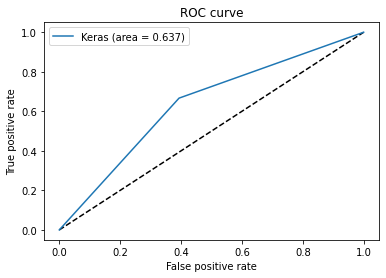

In [88]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [89]:
acc.append(accuracy_score(y_test, y_pred))
auc_sc.append(auc_keras)

#### Gaussian Bayes

In [90]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [91]:
y_pred = gnb.predict(x_test)

In [92]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1])

In [93]:
print("Accuracy score", accuracy_score(y_test, y_pred))
print("Confusion matrix\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy score 0.69
Confusion matrix
 [[39 22]
 [ 9 30]]
              precision    recall  f1-score   support

           0       0.81      0.64      0.72        61
           1       0.58      0.77      0.66        39

    accuracy                           0.69       100
   macro avg       0.69      0.70      0.69       100
weighted avg       0.72      0.69      0.69       100



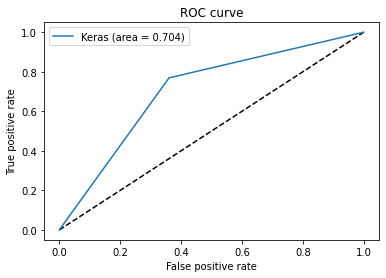

In [94]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [95]:
acc.append(accuracy_score(y_test, y_pred))
auc_sc.append(auc_keras)

#### K Nearest Neighbor

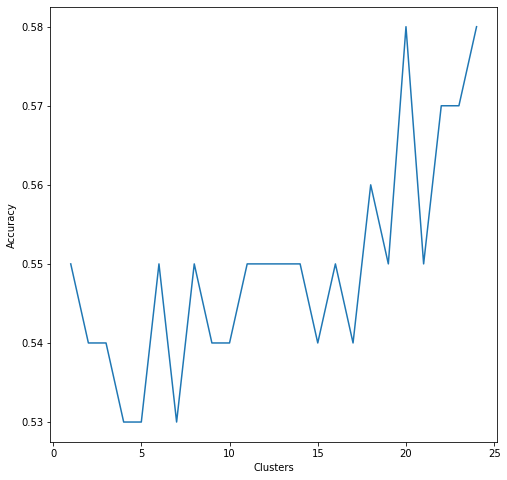

In [96]:
# find k
clusters = [] #value of k
accuracy = []
cr = []
cf = []

for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    clusters.append(i)
    accuracy.append(accuracy_score(y_test, y_pred))
    cr.append(classification_report(y_test, y_pred))
    cf.append(confusion_matrix(y_test,y_pred))

plt.figure(figsize=(8,8))
plt.plot(clusters, accuracy)
plt.xlabel("Clusters")
plt.ylabel("Accuracy")
plt.show()

The value of k which gives the maximum accuracy for 2 or more epochs is to be considered. Here we select k=20, 24 for accuracy=0.58

In [101]:
print("Accuracy score", accuracy[19])
print("Confusion matrix\n", cf[19])
print(cr[19])

Accuracy score 0.58
Confusion matrix
 [[28 33]
 [ 9 30]]
              precision    recall  f1-score   support

           0       0.76      0.46      0.57        61
           1       0.48      0.77      0.59        39

    accuracy                           0.58       100
   macro avg       0.62      0.61      0.58       100
weighted avg       0.65      0.58      0.58       100



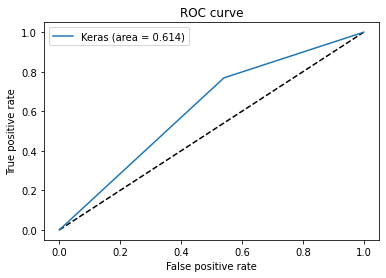

In [107]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [111]:
acc.append(accuracy[19])
auc_sc.append(auc_keras)

#### Random Forest

In [115]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [116]:
y_pred = rf.predict(x_test)

In [117]:
print("Accuracy score", accuracy_score(y_test, y_pred))
print("Confusion matrix\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy score 0.78
Confusion matrix
 [[56  5]
 [17 22]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        61
           1       0.81      0.56      0.67        39

    accuracy                           0.78       100
   macro avg       0.79      0.74      0.75       100
weighted avg       0.79      0.78      0.77       100



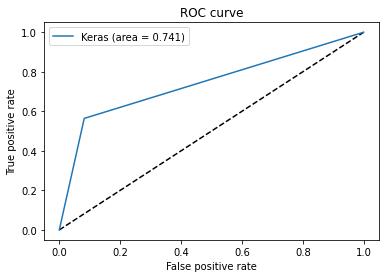

In [118]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [119]:
acc.append(accuracy_score(y_test, y_pred))
auc_sc.append(auc_keras)

#### Performance metrics

In [124]:
perf = pd.DataFrame(list(zip(acc, auc_sc)), index = algos, columns = ['Accuracy', 'AUC Score'])

In [125]:
perf

,Accuracy,AUC Score
LogReg,0.63,0.636612
GaussNB,0.69,0.704288
KNN,0.58,0.614124
RF,0.78,0.741068


#### Observation
1. Logistic regression performs better than KNN. We observe that KNN performs worst for class 0 while Logistic regression has a relatively low performance for class 1.
2. Gaussian Naive Bayes has a good performance for both the classes, but it has lower accuracy and AUC score than Random Forest. However it is observed that Random forest performs really well on class 0 while giving a mediocre result for class 1.
3. So it would depend on the situation where you would want to use which algorithm. If you want good performance on both classes, Naive bayes is better. And if you want only high accuracy, then go for Random Forest. However in this case, as it is a medical dataset, misclassification of the positive class is more costlier. So it would be wiser to declare Naive Bayes as a better algorithm for this dataset (with this much tuning).